## Importing important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data Set using panda

In [2]:
dataset = pd.read_excel("DS - Assignment Part 1 data set.xlsx")
dataset.head()

Transaction date  House Age  Distance from nearest Metro station (km)  \
0       2012.916667       32.0                                  84.87882   
1       2012.916667       19.5                                 306.59470   
2       2013.583333       13.3                                 561.98450   
3       2013.500000       13.3                                 561.98450   
4       2012.833333        5.0                                 390.56840   

   Number of convenience stores  latitude  longitude  Number of bedrooms  \
0                            10  24.98298  121.54024                   1   
1                             9  24.98034  121.53951                   2   
2                             5  24.98746  121.54391                   3   
3                             5  24.98746  121.54391                   2   
4                             5  24.97937  121.54245                   1   

   House size (sqft)  House price of unit area  
0                575                      37.9  
1               1240                      42.2  
2               1060                      47.3  
3                875                      54.8  
4                491                      43.1

In [3]:
#checking the shape of dataset.
dataset.shape

(414, 9)

So there are 414 rows and 9 columns

In [4]:
dataset.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [33]:
dataset.describe()

Transaction date   House Age  Distance from nearest Metro station (km)  \
count        414.000000  414.000000                                414.000000   
mean        2013.148953   17.712560                               1083.885689   
std            0.281995   11.392485                               1262.109595   
min         2012.666667    0.000000                                 23.382840   
25%         2012.916667    9.025000                                289.324800   
50%         2013.166667   16.100000                                492.231300   
75%         2013.416667   28.150000                               1454.279000   
max         2013.583333   43.800000                               6488.021000   

       Number of convenience stores  Number of bedrooms  House size (sqft)  \
count                    414.000000          414.000000         414.000000   
mean                       4.094203            1.987923         931.475845   
std                        2.945562            0.818875         348.910269   
min                        0.000000            1.000000         402.000000   
25%                        1.000000            1.000000         548.000000   
50%                        4.000000            2.000000         975.000000   
75%                        6.000000            3.000000        1234.750000   
max                       10.000000            3.000000        1500.000000   

       House price of unit area  
count                414.000000  
mean                  37.980193  
std                   13.606488  
min                    7.600000  
25%                   27.700000  
50%                   38.450000  
75%                   46.600000  
max                  117.500000

## Data Preprocessing

Now, we categorize the features depending on their datatype (int, float, object) and then calculate the number of them. 

In [5]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

Categorical variables: 0


In [6]:
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

Integer variables: 0


In [7]:
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Float variables: 6


## Exploratory Data Analysis

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<AxesSubplot: >

To analyze the different categorical features. Let’s draw the barplot.

In [9]:
unique_values = []
for col in fl_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
#plt.xticks(rotation=90)
sns.barplot(y=fl_cols,x=unique_values)

<AxesSubplot: title={'center': 'No. Unique values of Categorical Features'}>

The plot shows that house price of unit area has more than 250 unique categories and other features have more than 200 unique categories except Transaction date. To findout the actual count of each category we can plot the bargraph of each six features separately.

C:\Users\Admin\AppData\Local\Temp\ipykernel_2980\1052950275.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


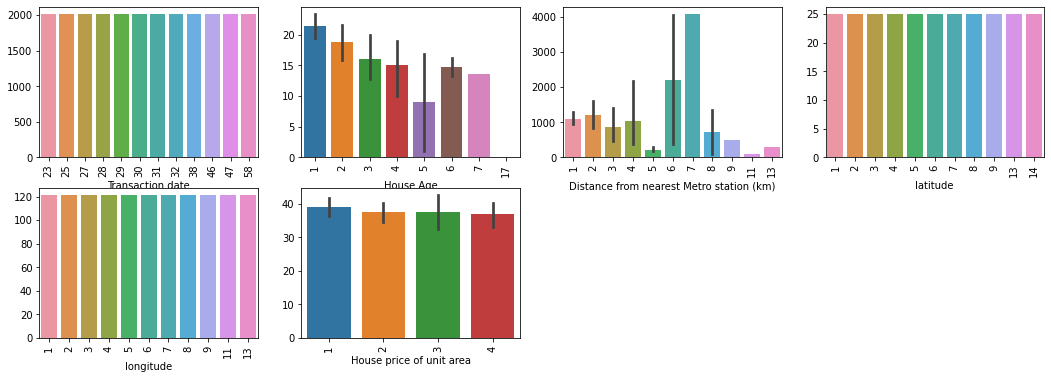

In [10]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in fl_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(y=list(y.index), x=y)
    index += 1

#### As latitude and longitude Column will not be participating in any prediction. So we can Drop it.

In [11]:
dataset.drop(['latitude', 'longitude'],
             axis=1,
             inplace=True)

## Data Cleaning

In [12]:
new_dataset = dataset.dropna()

In [13]:
new_dataset.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

So data set doesn't have any null values.

## OneHotEncoder – For Label categorical features

One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using OneHotEncoder, we can easily convert float data into int. So for that, firstly we have to collect all the features which have the object datatype. To do so, we will make a loop.

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
s = (new_dataset.dtypes == 'float')
fl_cols = list(s[s].index)
print("Categorical variables:")
print(fl_cols)
print('No. of. categorical features: ', len(fl_cols))

Categorical variables:
['Transaction date', 'House Age', 'Distance from nearest Metro station (km)', 'House price of unit area']
No. of. categorical features:  4


###### Then once we have a list of all the features. We can apply OneHotEncoding to the whole list.

In [16]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[fl_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Splitting Dataset into Training and Testing

X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [19]:
X = df_final.drop(['House price of unit area'], axis=1)
Y = df_final['House price of unit area']
 
# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

## Model and Accuracy

##### As we have to train the model to determine the continuous values, so we will be using these regression models.

##### 1. SVM-Support Vector Machine
##### 2. Random Forest Regressor
##### 3. Linear Regressor

### 1. SVM – Support vector Machine
SVM can be used for both regression and classification model. It finds the hyperplane in the n-dimensional plane.

In [22]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

In [23]:
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.20158219310046457


### 2. Random Forest Regression
Random Forest is an ensemble technique that uses multiple of decision trees and can be used for both regression and classification tasks

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
mean_absolute_percentage_error(Y_valid, Y_pred)

0.1281644618193141

### 3. Linear Regression
Linear Regression predicts the final output-dependent value based on the given independent features. Like, here we have to predict SalePrice depending on features like MSSubClass, YearBuilt, BldgType, Exterior1st etc.

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.14458641065713113


### Conclusion 
Clearly, SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.20 approx. To get much better results ensemble learning techniques like Bagging and Boosting can also be used.

In [31]:
new_dataset.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'Number of bedrooms',
       'House size (sqft)', 'House price of unit area'],
      dtype='object')

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


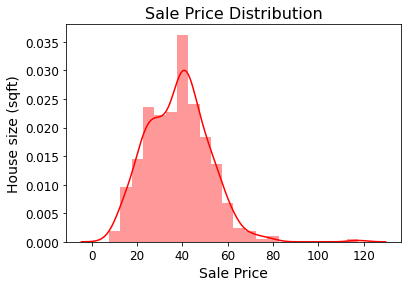

In [35]:
# 3. Distribution plot

sns.distplot(new_dataset['House price of unit area'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('House size (sqft)', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

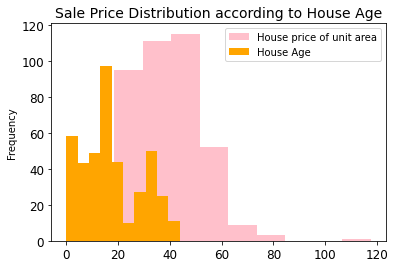

In [55]:
# checking the distribution of House price of unit area with House Age.

x = new_dataset['House price of unit area'].plot.hist(color = 'pink', figsize = (6, 4))
y = new_dataset['House Age'].plot.hist(color = 'orange', figsize = (6, 4))

plt.title('Sale Price Distribution according to House Age', fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()

According to above fig if House Age is less than the House Price is more.

In [57]:
# checking the distribution of House price of unit area with Distance from nearest Metro station (km).

x = new_dataset['House price of unit area'].plot.hist(color = 'red', figsize = (6, 4))
y = new_dataset['Distance from nearest Metro station (km)'].plot.hist(color = 'orange', figsize = (6, 4))

plt.title('Sale Price Distribution according to Distance from nearest Metro station (km)', fontsize = 10)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()

According to above fig if Distance from nearest Metro station is less than the House Price is more.

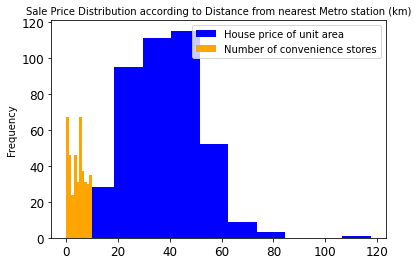

In [60]:
# checking the distribution of House price of unit area with Number of convenience stores.

x = new_dataset['House price of unit area'].plot.hist(color = 'blue', figsize = (6, 4))
y = new_dataset['Number of convenience stores'].plot.hist(color = 'orange', figsize = (6, 4))

plt.title('Sale Price Distribution according to Distance from nearest Metro station (km)', fontsize = 10)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()

According to above fig if Number of convenience stores is more than the House Price is more.

In [61]:
# checking the distribution of House price of unit area with Number of bedrooms.

x = new_dataset['House price of unit area'].plot.hist(color = 'purple', figsize = (6, 4))
y = new_dataset['Number of bedrooms'].plot.hist(color = 'orange', figsize = (6, 4))

plt.title('Sale Price Distribution according to Number of bedrooms', fontsize = 10)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()

According to above fig if Number of bedrooms is more than the House Price is more.

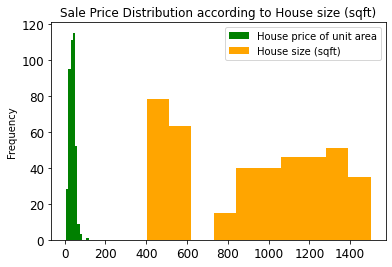

In [62]:
# checking the distribution of House price of unit area with House size (sqft).

x = new_dataset['House price of unit area'].plot.hist(color = 'green', figsize = (6, 4))
y = new_dataset['House size (sqft)'].plot.hist(color = 'orange', figsize = (6, 4))

plt.title('Sale Price Distribution according to House size (sqft)', fontsize = 12)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()

According to above fig if House size (sqft) is more than the House Price is more.

## Thanks !!!